# Project: Analysis of gun data from the FBI NICS Firearm Background Check Dataset, collated with the US census Data.

## Table of Contents
<ul>
<li><a href="#intro">Abstract</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Abstract 
The USA is one of the few countries of the world where ownership of a firearm is regarded a constitutional right. It is legal to carry a concealed firearm in all 50 states of the country, with many of the states not requiring permits to purchase or carry guns. According to a survey of U.S. adults carried out in March 13-27 and April 4-18 2017, titled [“America’s Complex Relationship With Guns”](https://www.pewresearch.org/social-trends/2017/06/22/the-demographics-of-gun-ownership/), 30% of American adults say they currently own a gun, and another  11% say they don’t personally own a gun but live with someone who does. Amongst the 69%  who don’t currently own a gun, including those who have never owned one, 36% may be open to doing so in the future. This is a visual representation of these metrics shown below, which is also gotten from [“America’s Complex Relationship With Guns”](https://www.pewresearch.org/social-trends/2017/06/22/the-demographics-of-gun-ownership/). 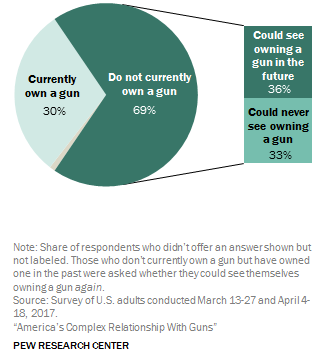

I will primarily be working with two datasets for this analysis.The first is the *NICS Gun Purchase Background Checks* dataset from the [FBI's National Instant Criminal Background Check System](https://www.fbi.gov/about-us/cjis/nics), which was converted from the original xlsx format to CSV using Microsoft Excel. This dataset contains the number of firearm checks done by the FBI from the year 1998 to 2017, sorted by month, state, and gun type. The NICS is used by the Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy firearms or explosives.

The other dataset is the *U.S census data*, which contains several variables at the state level. This dataset will be used to supplement the NICS Gun Purchase Background Checks in this analysis.

We are going to be examining some questions from these datasets. These questions include;
- What census data is associated with high gun per capita?
- What census data is associated with low gun per capita?
- What is the overall trend of permits issued?
- What is the overall trend of gun purchases?

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,10)
import seaborn as sns
%matplotlib inline

> Importing the needed Python libraries to be used in this project.
> These include numpy for mathematical functions, pandas for handling data, matplotlib and seaborn for visualization.
> matplotlib is set to inline to enable the visualizations show in this jupyter notebook 

<a id='wrangling'></a>
## Data Wrangling

First we are going to import the datasets that are going to be used in this analysis, and examine their general properties.

### Importing and Checking  General Properties

#### Importing and checking the first dataset.

In [2]:
Gun_data = pd.read_csv (r'C:\Users\PC\Documents\GitHub\ALX-T\Project 01\Datasets\gun_data.csv')
Gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
Gun_data.shape

(12485, 27)

In [4]:
Gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [5]:
Gun_data.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

>Although the datatype for month and state appear as object, this is actually not the case as will be shown below

In [7]:
type(Gun_data['month'][0])

str

 >The datatype for the month column appears as a string when it should actually be a date datatype.

In [8]:
type(Gun_data['state'][0])

str

In [39]:
Gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

> This details the columns in the dataset, the number of null values they contain, as well as their datatypes

> As may be observed from the above, there are many columns in the dataset that contain missing values.

In [40]:
sum(Gun_data.duplicated())

0

> This shows that there are no duplicate entries in this dataset.

The imported dataset provides information on the number of firearm checks and permits issued by month, state and type.
However, not all categories of background checks may be equally useful to this analysis. According to another [analysis](https://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html?mtrref=undefined&gwh=A4BFBC202DA1F8E87AF9A3337C7755A4&gwt=pay&assetType=PAYWALL) done by the Newyork Times on this same dataset, sales estimates are calculated from handgun, long gun and multiple-gun background checks. We are also going to apply this guideline to this analysis, as we will also be utilizing sales data. This means that this dataset will eventually need to be trimmed down to include just these needed columns.

The columns from the imported table with which we are concerned include;
- The first column which contains the month each entry was made'
- The second column which contains the states from which the firearm permits which were requested and issued were recorded.
- The third column which contains the number of permits issued.
- The fifth, sixth, and eighth columns, which contain data on permit checks made on handguns, long guns and multiple-guns respectively.
 

#### Importing and checking the second dataset.

In [9]:
Census_data = pd.read_csv (r'C:\Users\PC\Documents\GitHub\ALX-T\Project 01\Datasets\U.S. Census Data.csv')
Census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [10]:
Census_data.shape

(85, 52)

In [11]:
Census_data.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)",(c),"4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [12]:
Census_data.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


>All of the columns are of the string datatype and this is the case for reasons which will be explored later during the cleaning and trimming of this dataset.

Now we will check for missing data in the dataset.

In [14]:
Census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

> Virtually all the columns have missing data 

And lastly for this section we will check the dataset for duplicate entries

In [15]:
sum(Gun_data.duplicated())

0

> The dataset contains no duplicate entries

This dataset was imported to supply complementary data for this analysis. It contains US census data at the state level, with multiple variables such as; estimated population numbers, total number of persons over 65, etc.

Most of these variables have just one data point per state which are mostly from 2016.

## Data Trimming and Cleaning

### NICS Firearm Background Check Dataset

### Trimming

The first thing we are going to do in this section is trim the  dataset to include only the wanted columns.

In [16]:
Gun_data.drop(['permit_recheck', 'other', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals'], axis=1, inplace=True)

In [17]:
Gun_data.head()

,month,state,permit,handgun,long_gun,multiple
0,2017-09,Alabama,16717.0,5734.0,6320.0,317
1,2017-09,Alaska,209.0,2320.0,2930.0,160
2,2017-09,Arizona,5069.0,11063.0,7946.0,631
3,2017-09,Arkansas,2935.0,4347.0,6063.0,366
4,2017-09,California,57839.0,37165.0,24581.0,0


>The dataset has been trimmed down to only wanted columns.

Now we check these columns for errors.

### Cleaning

#### Incorrect Datatype

In [18]:
Gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   permit    12461 non-null  float64
 3   handgun   12465 non-null  float64
 4   long_gun  12466 non-null  float64
 5   multiple  12485 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 585.4+ KB


As may be observed above, the month column datatype appears as object which is a string instead of datetime.

In [19]:
Gun_data['month'] = pd.to_datetime(Gun_data.month, format = "%Y-%m")

>This fixes this error, and converts the month column to the datetime datatype.

#### Missing Data

Another error that may be observed from the columns is that there are some of them with missing values.

This may lead to problems during exploration and needs to be fixed.

In [20]:
Gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     12485 non-null  datetime64[ns]
 1   state     12485 non-null  object        
 2   permit    12461 non-null  float64       
 3   handgun   12465 non-null  float64       
 4   long_gun  12466 non-null  float64       
 5   multiple  12485 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 585.4+ KB


>The permit, handgun and long gun columns contain some null values

One simple way of fixing missing data is by inputing them with the mean of the non-null values in the column.

First lets get the mean of the permit column

In [21]:
mean = Gun_data['permit'].mean()
mean

6413.629403739667

Then we use Pandas' fillna function to fill null values with this mean

In [22]:
Gun_data['permit'].fillna(mean, inplace = True)

In [23]:
Gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     12485 non-null  datetime64[ns]
 1   state     12485 non-null  object        
 2   permit    12485 non-null  float64       
 3   handgun   12465 non-null  float64       
 4   long_gun  12466 non-null  float64       
 5   multiple  12485 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 585.4+ KB


> As may be observed above, the permit column no longer contains any missing data.

This process will now be repeated for the two other columns that contain missing data.

In [24]:
mean = Gun_data['handgun'].mean()
Gun_data['handgun'].fillna(mean, inplace = True)

In [25]:
mean = Gun_data['long_gun'].mean()
Gun_data['long_gun'].fillna(mean, inplace = True)

>All missing data has been filled, and we can now proceed to the next phase of cleaning 

#### Duplicate Data

Although when we checked earlier, the dataset contained no duplicate entries, it would be advisable to check again as there could be duplicates in the selected columns only. 

In [26]:
sum(Gun_data.duplicated())

0

>According to this, there are no duplicates in the dataframe.

This concludes the cleaning and trimming of the first dataset.

###  U.S Census data

### Trimming

Due to the complex nature of this dataset, it will require a whole of cleaning and trimming.

We will start this process by dropping unwanted columns from the dataset.

In [ ]:
Census_data.drop(['Fact Note'], axis=1, inplace=True)

In [29]:
Census_data.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


> This drops the Fact Note column which is not needed for this analysis.

We will go further with this trimming by dropping multiple rows from the dataset so as to retrieve the lastest population numbers, which will be needed for answering the research questions which were posed in the abstract. We will create a variable which will house this new dataframe.

In [30]:
mask = Census_data['Fact'] == 'Population estimates, July 1, 2016,  (V2016)'
print(mask)

0      True
1     False
2     False
3     False
4     False
      ...  
80    False
81    False
82    False
83    False
84    False
Name: Fact, Length: 85, dtype: bool


In [31]:
Census_data_p = Census_data[Census_data['Fact'] == 'Population estimates, July 1, 2016,  (V2016)']
Census_data_p.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


> The latest population numbers we could retrieve from the US census dataset was from 2016 which is now stored in the variable Census_data_p

In order to avoid issues when visualizing the data it is best the Fact column is also dropped. 

In [ ]:
Census_data_p.drop(['Fact'], axis=1, inplace=True)

It will however be very difficult to visualize this dataframe in it's current state. we will need to set the states as the index for the dataframe to make visualization possible. This will be achieved using the pandas Transpose function, and save the dataframe in a new variable.

In [33]:
Census_data_n = Census_data_p.T

In [34]:
print(Census_data_n)

                         0
Alabama          4,863,300
Alaska             741,894
Arizona          6,931,071
Arkansas         2,988,248
California      39,250,017
Colorado         5,540,545
Connecticut      3,576,452
Delaware           952,065
Florida         20,612,439
Georgia         10,310,371
Hawaii           1,428,557
Idaho            1,683,140
Illinois        12,801,539
Indiana          6,633,053
Iowa             3,134,693
Kansas           2,907,289
Kentucky         4,436,974
Louisiana        4,681,666
Maine            1,331,479
Maryland         6,016,447
Massachusetts    6,811,779
Michigan         9,928,300
Minnesota        5,519,952
Mississippi      2,988,726
Missouri         6,093,000
Montana          1,042,520
Nebraska         1,907,116
Nevada           2,940,058
New Hampshire    1,334,795
New Jersey       8,944,469
New Mexico         2081015
New York          19745289
North Carolina    10146788
North Dakota        757952
Ohio              11614373
Oklahoma           3923561
O

> The row has been converted into a column and the new data frame is saved in Census_data_n

Let us now give this new column an appropriate name

In [35]:
Census_data_n.columns = ['population']

In [36]:
Census_data_n = Census_data_n.rename({'': 'state'}, axis=1)

In [40]:
Census_data_n.head()

,state,population
0,Alabama,4863300
1,Alaska,741894
2,Arizona,6931071
3,Arkansas,2988248
4,California,39250017


> Both columns have been named appropriately.

Now that all unwanted columns have been removed, and all other issues sorted, we can proceed with the cleaning phase.

### Cleaning

In [194]:
Census_data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       50 non-null     object
 1   population  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


> The dataframe seems to be clean, with all rows intact, and in the right datatype.

Now that both datasets have cleaned and trimmed, we can now proceed to the exploratory analysis section of this report.

<a id='eda'></a>
## Exploratory Data Analysis

In this section, we will answer the research questions that were posed in the abstract of this analysis. However, before delving into this, let us first get a histogram of all the numerical variables in the datasets.

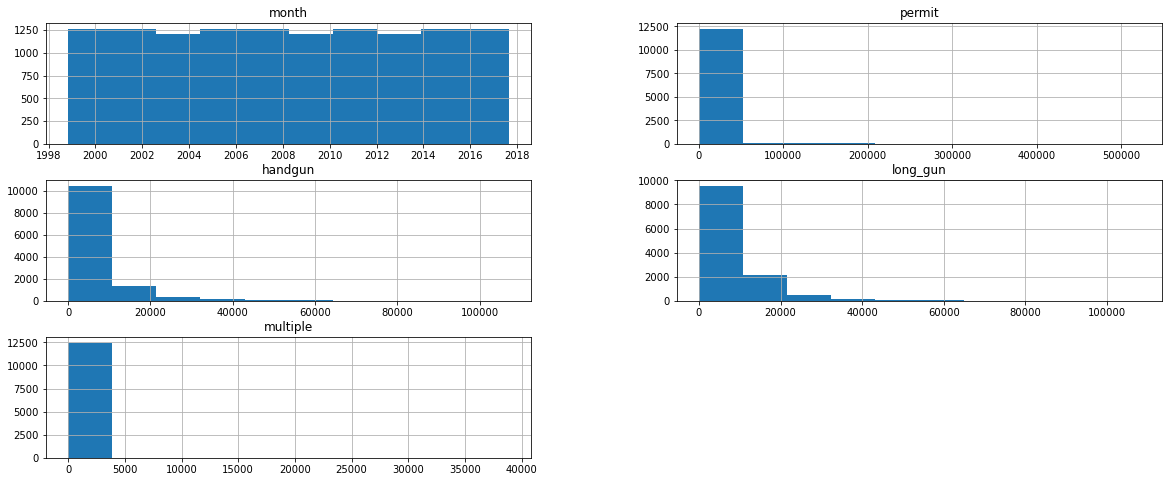

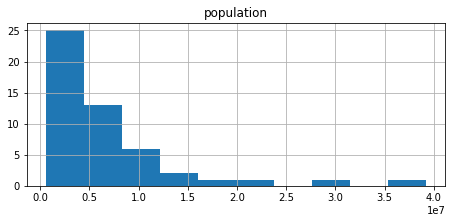

In [49]:
Gun_data.hist(figsize=(20, 8));
Census_data_n.hist(figsize=(7.5, 3));

### Question I : What census data is associated with high gun per capita?

In ascertaining what census data is associated with high gun per capita, we will be comparing the latest population numbers from the US census dataset, with corresponding gun data from the NICS gun background checks dataset. 


In [50]:
Census_data_n.head()

,state,population
0,Alabama,4863300
1,Alaska,741894
2,Arizona,6931071
3,Arkansas,2988248
4,California,39250017


we will need to compare this census data with gun data from the year 2016. To retrieve the needed gun data we will use pandas to create a dataframe consisting of only the wanted columns.

In [51]:
Gun_data_2016 = Gun_data[Gun_data['month'] == '2016']

>Gun data from 2016 retrieved

In [52]:
gds = Gun_data_2016.groupby(['state']).sum().reset_index()
gds.head()

,state,permit,handgun,long_gun,multiple
0,Alabama,27242.0,25445.0,14785.0,884
1,Alaska,192.0,2859.0,2245.0,164
2,Arizona,3898.0,15745.0,8512.0,575
3,Arkansas,3670.0,7954.0,5982.0,340
4,California,127715.0,52139.0,32970.0,0


> Gun data from 2016 grouped by state.

Let us get a simple visualization of these variables.

In [64]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (7,10)

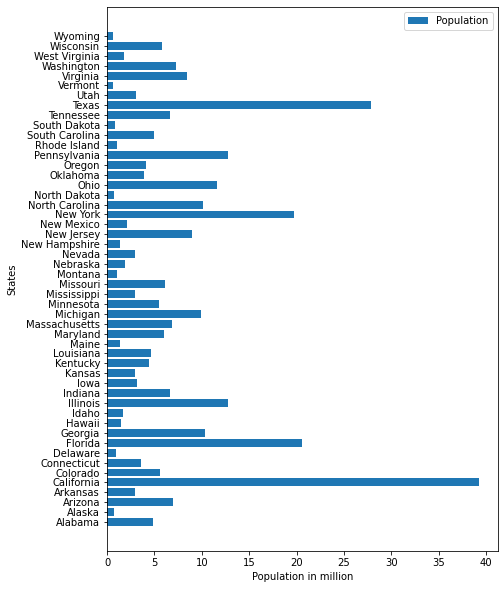

In [61]:
plt.barh(Census_data_n.state, Census_data_n.population / 10**6)
plt.legend(['Population'])
plt.xlabel('Population in million')
plt.ylabel('States')
plt.show()

> Visualization of the population per state in millions using an horizontal bar graph.

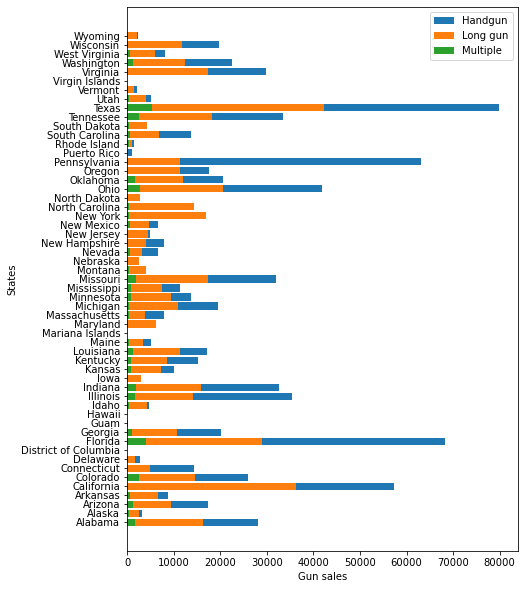

In [65]:
plt.barh(gds.state, gds.handgun * 1.1)
plt.barh(gds.state, gds.long_gun * 1.1)
plt.barh(gds.state, gds.multiple * 2)
plt.legend(['Handgun', 'Long gun', 'Multiple'])
plt.xlabel('Gun sales')
plt.ylabel('States')
plt.show()

> Visualization of gun sales per state for handgun, long gun and multiple purchases. The multiple column was multiplied by 2 because it was stated in the analysis of this same dataset by the Newyork Times that each entry in the multiple column counts as 2 sales, while each entry in the the handgun and long gun columns count as 1.1 sales.

To compare the dataframes, lets get the percentage of the total population, that the total gun sales represents. However before getting the total of the gun sales, we need to multiply the handgun and long gun columns by 1.1 and the multiple column by 2.

In [66]:
gds['handgun'] = gds['handgun'].multiply(1.1)

In [67]:
gds['long_gun'] = 

0     27989.5
1      3144.9
2     17319.5
3      8749.4
4     57352.9
5     25869.8
6     14405.6
7      2802.8
8        57.2
9     68293.5
10    20059.6
11      112.2
12        0.0
13     4643.1
14    35323.2
15    32618.3
16      321.2
17    10115.6
18    15231.7
19    17033.5
20     5087.5
21        0.0
22     4379.1
23     7932.1
24    19405.1
25    13668.6
26    11282.7
27    31878.0
28     3689.4
29      196.9
30     6670.4
31     7860.6
32     4972.0
33     6513.1
34    13222.0
35     1485.0
36     2374.9
37    41830.8
38    20556.8
39    17523.0
40    63090.5
41     1034.0
42     1554.3
43    13618.0
44     4160.2
45    33452.1
46    79888.6
47     5128.2
48     2049.3
49       28.6
50    29736.3
51    22469.7
52     8160.9
53    19765.9
54     2399.1
Name: handgun, dtype: float64

In [384]:
gds['Total'] = gds['handgun'] + gds['long_gun'] + gds['multiple']

In [385]:
gds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     55 non-null     object 
 1   permit    55 non-null     float64
 2   handgun   55 non-null     float64
 3   long_gun  55 non-null     float64
 4   multiple  55 non-null     int64  
 5   sum       55 non-null     float64
 6   Total     55 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.1+ KB


In [383]:
Census_data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  50 non-null     object 
 1   population             50 non-null     int64  
 2   percentage_difference  50 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
Census_data_n['percentage_difference'] = gds['sum'] / Census_data_n['population']

### Question III: What is the overall trend of permits issued?

This is a very straight forward variable to plot. All we need do is set the number of permits issued for the first year at 100%, then get progression of growth over the rest of the years.

In [332]:
frs = Gun_data.groupby(['month']).sum().reset_index()
frs.head()

,month,permit,handgun,long_gun,multiple
0,1998-11-01,2073.0,6859.000000,11909.000000,275
1,1998-12-01,76096.0,219080.881107,578692.847585,8445
2,1999-01-01,77072.0,190436.881107,317725.847585,7498
3,1999-02-01,84759.0,238388.881107,360221.847585,9226
4,1999-03-01,103185.0,246976.881107,384585.847585,9537


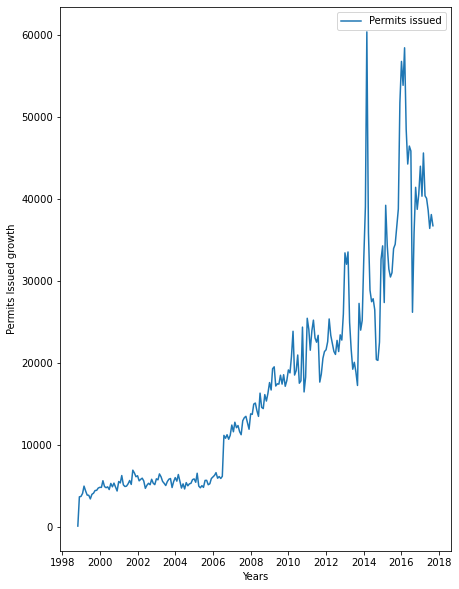

In [349]:
plt.plot(frs.month, frs.permit / frs.permit.iloc[0] * 100)
plt.legend(['Permits issued'])
plt.xlabel('Years')
plt.ylabel('Permits Issued growth')
plt.show()

> This shows the growth of permits issued for gun ownership in the US from 1998 to 2018.

### Question IIII : What is the overall trend of gun purchases?

As earlier stated, for the sake of this analysis, only the columns containing permit checks for the handgun, long gun, and multiple guns will be considered as gun sales. And so, in tackling this research question, all we need to do is examine the progression of the sum of these three variables over time frame provided for us in the dataset.

The first variable we will consider the handgun sales.

In [ ]:
gdm = Gun_data.groupby('month').sum().reset_index()
gdm['Sum'] = gdm['handgun'] + gdm['long_gun'] + gdm['multiple']

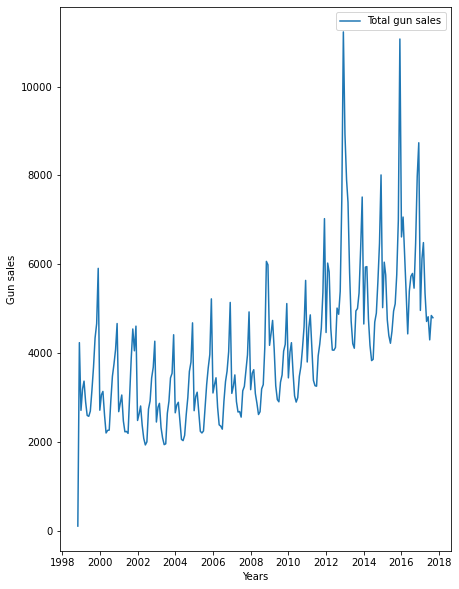

In [361]:
plt.plot(gdm.month, gdm.Sum / gdm.Sum.iloc[0] * 100 )
plt.legend(['Total gun sales'])
plt.xlabel('Years')
plt.ylabel('Gun sales')
plt.show()

> This shows the growth of gun sales in the US from 1998 to 2018.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!